# Notebook 2: Adimensionalización de la Ecuación de Advección-Difusión-Reacción

## Modelación del Transporte de Contaminantes en Canales Abiertos

En este notebook, exploraremos el proceso de adimensionalización de la ecuación de advección-difusión-reacción (ADR), una herramienta fundamental para el modelado del transporte de contaminantes en canales abiertos.

**Ecuación a estudiar:**

$$\frac{\partial C}{\partial t} + U\frac{\partial C}{\partial x} = D\frac{\partial^2 C}{\partial x^2} - kC$$

Donde:
- $C$ es la concentración del contaminante [mg/L]
- $t$ es el tiempo [s]
- $x$ es la distancia a lo largo del canal [m]
- $U$ es la velocidad del flujo [m/s]
- $D$ es el coeficiente de dispersión longitudinal [m²/s]
- $k$ es la constante de decaimiento de primer orden [1/s]

In [64]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation

# Configuración de visualización
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')  # Estilo visual moderno

## 1. Introducción a la Adimensionalización

### ¿Qué es la adimensionalización?

La adimensionalización es un proceso matemático mediante el cual transformamos una ecuación con dimensiones físicas (como longitud, tiempo, masa) en una ecuación sin dimensiones, utilizando escalas características del problema.

### ¿Por qué es importante?

La adimensionalización ofrece numerosas ventajas:

1. **Simplificación**: Reduce el número de parámetros que caracterizan el problema.
2. **Generalización**: Permite aplicar soluciones a diferentes escenarios con características similares.
3. **Identificación de regímenes**: Revela números adimensionales que indican la importancia relativa de diferentes procesos físicos.
4. **Estabilidad numérica**: Mejora la estabilidad de los métodos numéricos al trabajar con valores normalizados.
5. **Análisis de escala**: Facilita la identificación de términos dominantes y despreciables.

En el contexto del transporte de contaminantes, la adimensionalización nos permite caracterizar el comportamiento del sistema mediante números adimensionales clave como el número de Péclet (relación entre advección y difusión) y el número de Damköhler (relación entre reacción y advección).

## 2. Desarrollo del Proceso de Adimensionalización

### Paso 1: Identificación de las escalas características

Para adimensionalizar nuestra ecuación, primero debemos identificar las escalas características relevantes del problema:

- Longitud característica ($L$): Puede ser la longitud del tramo de estudio [m]
- Tiempo característico ($T$): Podemos definirlo como $T = L/U$, que representa el tiempo que tarda el flujo en recorrer la longitud característica [s]
- Concentración característica ($C_0$): Concentración inicial o máxima del contaminante [mg/L]

### Paso 2: Definición de variables adimensionales

Definimos las siguientes variables adimensionales:

- Posición adimensional: $X = x/L$
- Tiempo adimensional: $\tau = t/T = t \cdot U/L$
- Concentración adimensional: $\Phi = C/C_0$

### Paso 3: Transformación de las derivadas

Aplicamos la regla de la cadena para transformar las derivadas:

$$\frac{\partial C}{\partial t} = C_0 \frac{\partial \Phi}{\partial t} = C_0 \frac{\partial \Phi}{\partial \tau} \frac{\partial \tau}{\partial t} = C_0 \frac{\partial \Phi}{\partial \tau} \frac{U}{L}$$

$$\frac{\partial C}{\partial x} = C_0 \frac{\partial \Phi}{\partial x} = C_0 \frac{\partial \Phi}{\partial X} \frac{\partial X}{\partial x} = C_0 \frac{\partial \Phi}{\partial X} \frac{1}{L}$$

$$\frac{\partial^2 C}{\partial x^2} = C_0 \frac{\partial^2 \Phi}{\partial x^2} = C_0 \frac{\partial}{\partial x}\left(\frac{\partial \Phi}{\partial X} \frac{1}{L}\right) = C_0 \frac{\partial^2 \Phi}{\partial X^2} \frac{1}{L^2}$$

### Paso 4: Sustitución en la ecuación original

Sustituimos estas transformaciones en la ecuación original:

$$C_0 \frac{\partial \Phi}{\partial \tau} \frac{U}{L} + U \cdot C_0 \frac{\partial \Phi}{\partial X} \frac{1}{L} = D \cdot C_0 \frac{\partial^2 \Phi}{\partial X^2} \frac{1}{L^2} - k \cdot C_0 \Phi$$

Simplificando y dividiendo toda la ecuación por $C_0 \cdot \frac{U}{L}$:

$$\frac{\partial \Phi}{\partial \tau} + \frac{\partial \Phi}{\partial X} = \frac{D}{UL} \frac{\partial^2 \Phi}{\partial X^2} - \frac{kL}{U} \Phi$$

### Paso 5: Identificación de números adimensionales

En la ecuación anterior, podemos identificar dos números adimensionales importantes:

1. **Número de Péclet inverso**: $Pe^{-1} = \frac{D}{UL}$
2. **Número de Damköhler**: $Da = \frac{kL}{U}$

Así, nuestra ecuación adimensional final queda:

$$\frac{\partial \Phi}{\partial \tau} + \frac{\partial \Phi}{\partial X} = \frac{1}{Pe} \frac{\partial^2 \Phi}{\partial X^2} - Da \cdot \Phi$$

Esta forma es mucho más compacta y nos permite entender el comportamiento del sistema en términos de solo dos parámetros adimensionales: $Pe$ y $Da$.

## 3. Análisis de Números Adimensionales

Los números adimensionales que hemos obtenido tienen un significado físico importante:

### Número de Péclet ($Pe = \frac{UL}{D}$)

El número de Péclet representa la relación entre el transporte por advección (debido al flujo) y el transporte por difusión/dispersión.

- $Pe \gg 1$: Domina la advección. El contaminante se mueve principalmente con el flujo del agua.
- $Pe \ll 1$: Domina la difusión. El contaminante se dispersa en todas direcciones, independientemente del flujo.
- $Pe \approx 1$: Ambos mecanismos son importantes.

### Número de Damköhler ($Da = \frac{kL}{U}$)

El número de Damköhler representa la relación entre la tasa de reacción (decaimiento) y la tasa de transporte advectivo.

- $Da \gg 1$: Domina la reacción. El contaminante reacciona/decae antes de ser transportado significativamente.
- $Da \ll 1$: Domina la advección. El contaminante es transportado antes de reaccionar/decaer significativamente.
- $Da \approx 1$: Ambos procesos son relevantes en escalas de tiempo similares.

Implementemos funciones para calcular estos números adimensionales:

In [65]:
def calcular_peclet(U, L, D):
    """Calcula el número de Péclet.
    
    Parámetros:
    -----------
    U : float
        Velocidad del flujo [m/s]
    L : float
        Longitud característica [m]
    D : float
        Coeficiente de dispersión [m²/s]
        
    Retorna:
    --------
    float
        Número de Péclet
    """
    # Verificamos que los parámetros sean positivos
    if U <= 0 or L <= 0 or D <= 0:
        raise ValueError("Todos los parámetros deben ser positivos")
    
    return U * L / D

def calcular_damkohler(k, L, U):
    """Calcula el número de Damköhler.
    
    Parámetros:
    -----------
    k : float
        Constante de decaimiento [1/s]
    L : float
        Longitud característica [m]
    U : float
        Velocidad del flujo [m/s]
        
    Retorna:
    --------
    float
        Número de Damköhler
    """
    # Verificamos que los parámetros sean válidos
    if k < 0 or L <= 0 or U <= 0:
        raise ValueError("Los parámetros deben ser positivos (k puede ser cero)")
    
    return k * L / U

# Ejemplo de cálculo
U_ejemplo = 0.5  # m/s
L_ejemplo = 1000  # m
D_ejemplo = 10  # m²/s
k_ejemplo = 0.0001  # 1/s

Pe = calcular_peclet(U_ejemplo, L_ejemplo, D_ejemplo)
Da = calcular_damkohler(k_ejemplo, L_ejemplo, U_ejemplo)

print(f"Para un canal con las siguientes características:")
print(f"  - Velocidad: {U_ejemplo} m/s")
print(f"  - Longitud: {L_ejemplo} m")
print(f"  - Dispersión: {D_ejemplo} m²/s")
print(f"  - Decaimiento: {k_ejemplo} 1/s")
print(f"\nLos números adimensionales son:")
print(f"  - Número de Péclet (Pe): {Pe:.2f}")
print(f"  - Número de Damköhler (Da): {Da:.4f}")
print(f"\nInterpretación:")
if Pe > 10:
    print(f"  - Pe > 10: El transporte está dominado por la advección")
elif Pe < 0.1:
    print(f"  - Pe < 0.1: El transporte está dominado por la dispersión")
else:
    print(f"  - 0.1 < Pe < 10: Tanto la advección como la dispersión son relevantes")
    
if Da > 1:
    print(f"  - Da > 1: La reacción ocurre más rápido que el transporte advectivo")
elif Da < 0.01:
    print(f"  - Da < 0.01: El transporte advectivo es mucho más rápido que la reacción")
else:
    print(f"  - 0.01 < Da < 1: El transporte y la reacción ocurren en escalas comparables")

Para un canal con las siguientes características:
  - Velocidad: 0.5 m/s
  - Longitud: 1000 m
  - Dispersión: 10 m²/s
  - Decaimiento: 0.0001 1/s

Los números adimensionales son:
  - Número de Péclet (Pe): 50.00
  - Número de Damköhler (Da): 0.2000

Interpretación:
  - Pe > 10: El transporte está dominado por la advección
  - 0.01 < Da < 1: El transporte y la reacción ocurren en escalas comparables


## 4. Implementación en Python de la Forma Adimensional

Ahora implementaremos la solución numérica de la ecuación adimensional. Utilizaremos un método de diferencias finitas para la discretización espacial y una integración temporal mediante el solver `solve_ivp` de SciPy.

### Definición del problema adimensional

Recordemos que nuestra ecuación adimensional es:

$$\frac{\partial \Phi}{\partial \tau} + \frac{\partial \Phi}{\partial X} = \frac{1}{Pe} \frac{\partial^2 \Phi}{\partial X^2} - Da \cdot \Phi$$

Para resolverla numéricamente, debemos discretizar el dominio espacial y definir condiciones iniciales y de contorno apropiadas.

In [66]:
def adr_adimensional(tau, phi, Pe, Da, num_points):
    """Función que define la ecuación diferencial adimensional ADR.
    
    Esta función será pasada al solver de scipy para integración temporal.
    
    Parámetros:
    -----------
    tau : float
        Tiempo adimensional
    phi : array
        Vector de concentraciones adimensionales en todos los puntos espaciales
    Pe : float
        Número de Péclet
    Da : float
        Número de Damköhler
    num_points : int
        Número de puntos en la discretización espacial
        
    Retorna:
    --------
    array
        Derivadas temporales de phi en todos los puntos
    """
    # Verificamos que Pe sea positivo
    if Pe <= 0:
        raise ValueError("El número de Péclet debe ser positivo")
    
    # Paso espacial
    dX = 1.0 / (num_points - 1)
    
    # Inicializamos el vector de derivadas
    dphi_dtau = np.zeros_like(phi)
    
    # Nodos internos: diferencias finitas centradas para la segunda derivada
    # y diferencias hacia atrás para la primera derivada (upwind scheme)
    for i in range(1, num_points - 1):
        # Término advectivo (upwind)
        adveccion = (phi[i] - phi[i-1]) / dX
        
        # Término difusivo (diferencias centradas)
        difusion = (phi[i+1] - 2*phi[i] + phi[i-1]) / (dX**2)
        
        # Término reactivo
        reaccion = Da * phi[i]
        
        # Ecuación completa
        dphi_dtau[i] = -adveccion + (1/Pe) * difusion - reaccion
    
    # Condición de contorno en X=0 (entrada): gradiente nulo
    dphi_dtau[0] = 0
    
    # Condición de contorno en X=1 (salida): gradiente nulo
    dphi_dtau[-1] = dphi_dtau[-2]
    
    return dphi_dtau

def resolver_adr_adimensional(Pe, Da, num_points=101, tiempo_final=2.0):
    """Resuelve la ecuación ADR adimensional.
    
    Parámetros:
    -----------
    Pe : float
        Número de Péclet
    Da : float
        Número de Damköhler
    num_points : int, opcional
        Número de puntos espaciales (default: 101)
    tiempo_final : float, opcional
        Tiempo adimensional final (default: 2.0)
        
    Retorna:
    --------
    tuple
        (X, tau, phi) - Coordenadas espaciales, tiempos y soluciones
    """
    # Definimos la malla espacial
    X = np.linspace(0, 1, num_points)
    
    # Condición inicial: pulso gaussiano
    sigma = 0.05  # Ancho del pulso
    phi_inicial = np.exp(-((X - 0.2) / sigma)**2)
    
    # Tiempos de integración
    tiempos_evaluacion = np.linspace(0, tiempo_final, 101)
    
    # Resolvemos la ecuación diferencial
    solucion = solve_ivp(
        lambda t, y: adr_adimensional(t, y, Pe, Da, num_points),
        [0, tiempo_final],
        phi_inicial,
        t_eval=tiempos_evaluacion,
        method='RK45',
        rtol=1e-4,
        atol=1e-6
    )
    
    # Extraemos los resultados
    tau = solucion.t
    phi = solucion.y.T  # Transponer para tener forma (tiempo, espacio)
    
    return X, tau, phi

### Función para visualizar los resultados

Implementemos una función para visualizar la evolución de la concentración a lo largo del dominio adimensional:

In [67]:
def visualizar_evolucion(X, tau, phi, titulo=None):
    """Visualiza la evolución temporal de la concentración adimensional.
    
    Parámetros:
    -----------
    X : array
        Coordenadas espaciales adimensionales
    tau : array
        Tiempos adimensionales
    phi : array
        Solución de la concentración adimensional con forma (len(tau), len(X))
    titulo : str, opcional
        Título para la gráfica
    """
    # Verificación de datos de entrada
    if X is None or tau is None or phi is None:
        raise ValueError("Todos los parámetros deben contener datos válidos")
    
    if phi.shape != (len(tau), len(X)):
        raise ValueError(f"La forma de phi debe ser ({len(tau)}, {len(X)}), pero es {phi.shape}")
    
    # Seleccionamos algunos tiempos para visualizar (para no saturar la gráfica)
    num_curvas = 5
    indices_tiempo = np.linspace(0, len(tau)-1, num_curvas, dtype=int)
    
    # Creamos la figura
    plt.figure(figsize=(10, 6))
    
    # Definimos colores en degradado
    colores = plt.cm.viridis(np.linspace(0, 1, num_curvas))
    
    # Graficamos cada curva de tiempo
    for i, idx in enumerate(indices_tiempo):
        t = tau[idx]
        plt.plot(X, phi[idx], '-', color=colores[i], linewidth=2.5, 
                 label=f'τ = {t:.2f}')
    
    # Configuramos la gráfica
    if titulo:
        plt.title(titulo, fontsize=14)
    else:
        plt.title('Evolución de la Concentración Adimensional', fontsize=14)
    
    plt.xlabel('Posición Adimensional (X)', fontsize=12)
    plt.ylabel('Concentración Adimensional (Φ)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()
    
    # Mostramos la gráfica
    plt.show()

## 5. Visualizaciones de Diferentes Regímenes de Comportamiento

Ahora, exploraremos diferentes regímenes de comportamiento variando los números de Péclet y Damköhler.

Resolviendo para régimen advectivo dominante (Pe=100, Da=0.01)...


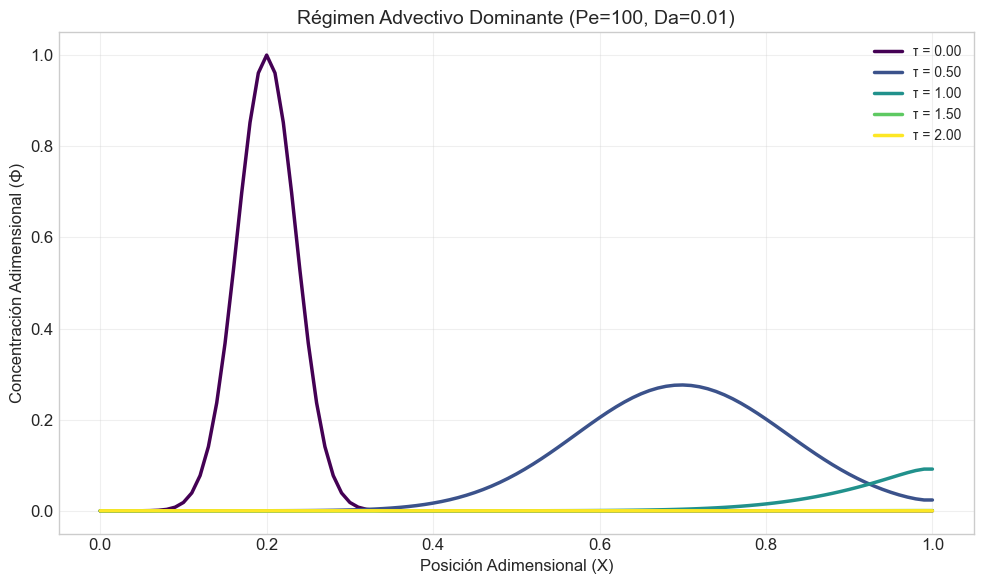

In [68]:
# 5.1 Régimen dominado por advección (Pe alto, Da bajo)
Pe_advectivo = 100  # Alta relación advección/difusión
Da_advectivo = 0.01  # Baja relación reacción/advección

print("Resolviendo para régimen advectivo dominante (Pe=100, Da=0.01)...")
X, tau, phi = resolver_adr_adimensional(Pe_advectivo, Da_advectivo)

# Visualizamos los resultados
visualizar_evolucion(X, tau, phi, 
                     titulo=f'Régimen Advectivo Dominante (Pe={Pe_advectivo}, Da={Da_advectivo})')

Resolviendo para régimen difusivo dominante (Pe=1, Da=0.01)...


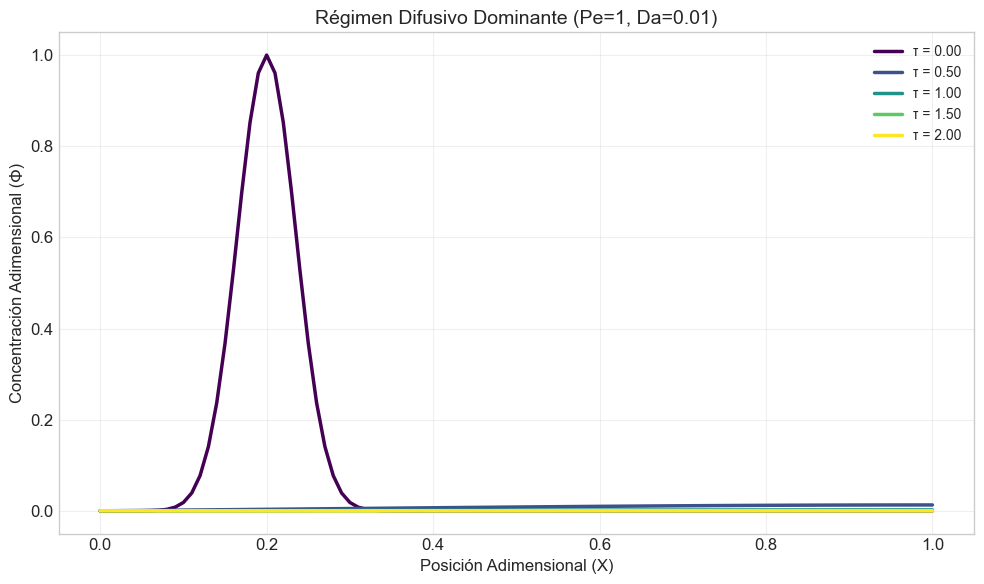

In [69]:
# 5.2 Régimen dominado por difusión (Pe bajo, Da bajo)
Pe_difusivo = 1  # Baja relación advección/difusión
Da_difusivo = 0.01  # Baja relación reacción/advección

print("Resolviendo para régimen difusivo dominante (Pe=1, Da=0.01)...")
X, tau, phi = resolver_adr_adimensional(Pe_difusivo, Da_difusivo)

# Visualizamos los resultados
visualizar_evolucion(X, tau, phi, 
                     titulo=f'Régimen Difusivo Dominante (Pe={Pe_difusivo}, Da={Da_difusivo})')

Resolviendo para régimen reactivo dominante (Pe=10, Da=2)...


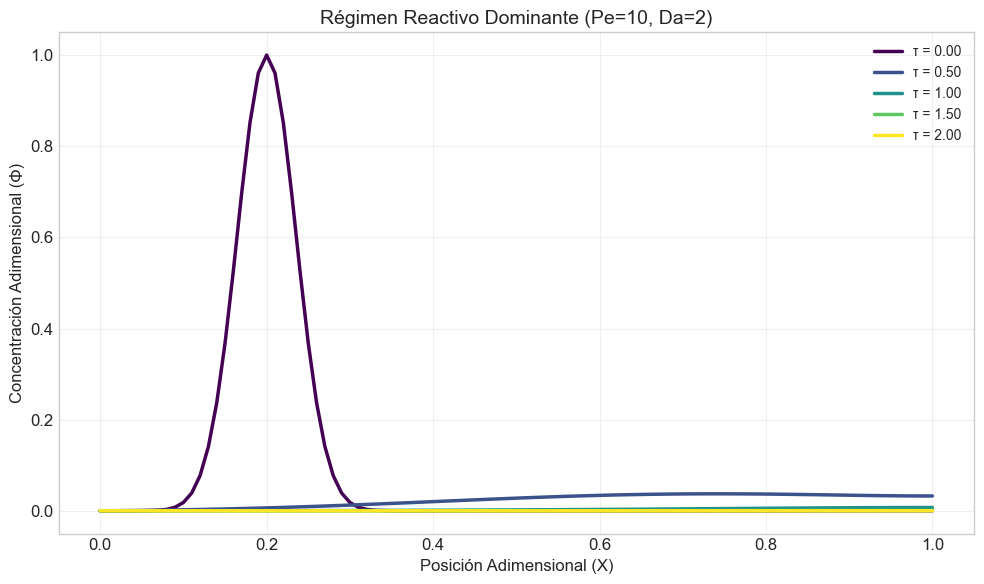

In [70]:
# 5.3 Régimen dominado por reacción (Pe moderado, Da alto)
Pe_reactivo = 10  # Relación advección/difusión moderada
Da_reactivo = 2  # Alta relación reacción/advección

print("Resolviendo para régimen reactivo dominante (Pe=10, Da=2)...")
X, tau, phi = resolver_adr_adimensional(Pe_reactivo, Da_reactivo)

# Visualizamos los resultados
visualizar_evolucion(X, tau, phi, 
                     titulo=f'Régimen Reactivo Dominante (Pe={Pe_reactivo}, Da={Da_reactivo})')

Resolviendo para régimen equilibrado (Pe=10, Da=0.5)...


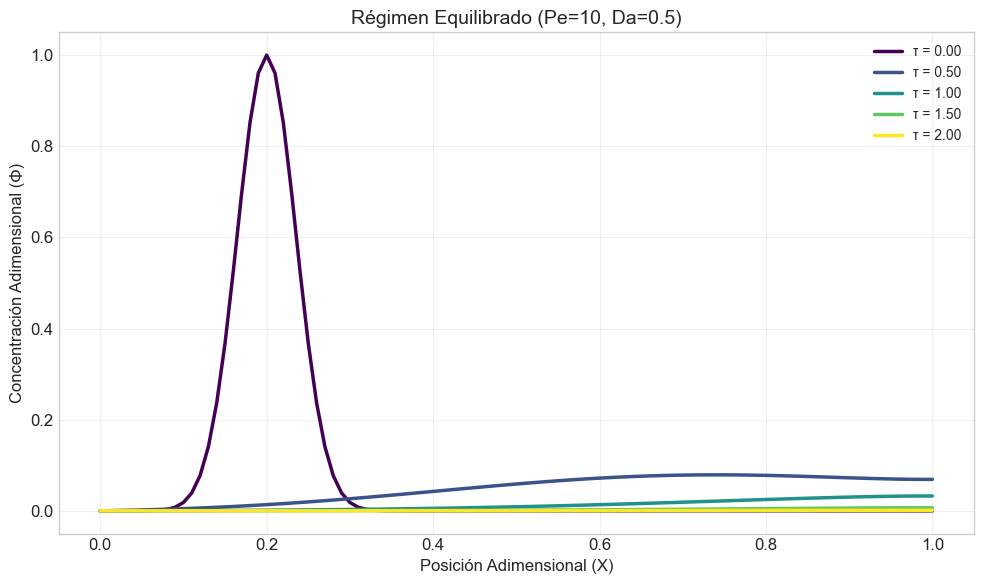

In [71]:
# 5.4 Régimen equilibrado (Pe moderado, Da moderado)
Pe_equilibrado = 10  # Relación advección/difusión moderada
Da_equilibrado = 0.5  # Relación reacción/advección moderada

print("Resolviendo para régimen equilibrado (Pe=10, Da=0.5)...")
X, tau, phi = resolver_adr_adimensional(Pe_equilibrado, Da_equilibrado)

# Visualizamos los resultados
visualizar_evolucion(X, tau, phi, 
                     titulo=f'Régimen Equilibrado (Pe={Pe_equilibrado}, Da={Da_equilibrado})')

### Análisis Comparativo de los Diferentes Regímenes

Implementemos una función para comparar diferentes regímenes en una única gráfica:

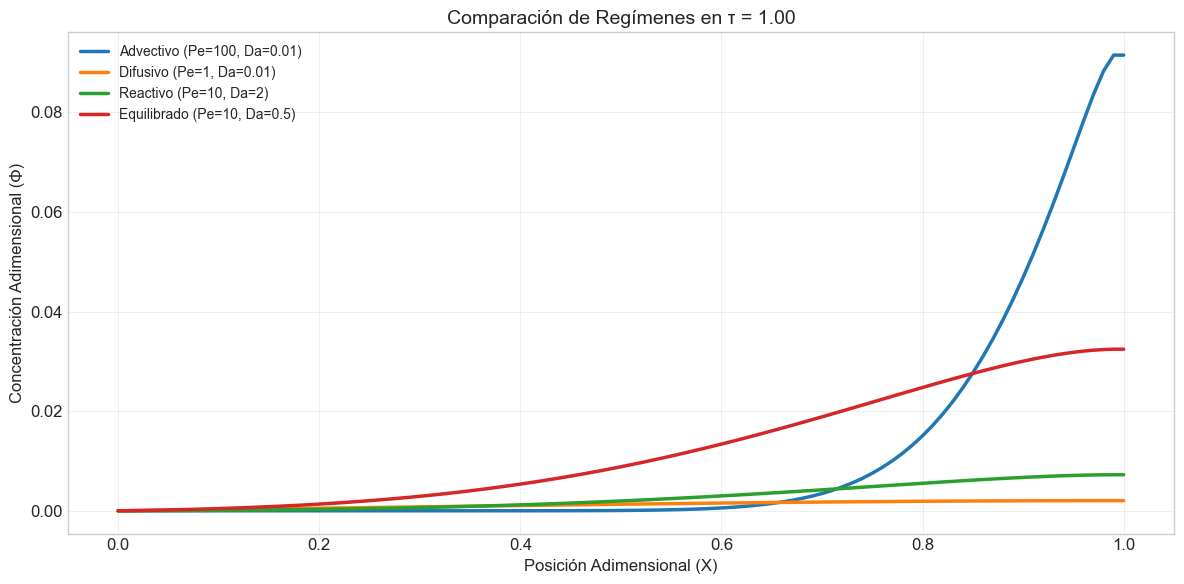

In [73]:
def comparar_regimenes(parametros, tiempo_indice=50):
    """Compara diferentes regímenes en un tiempo específico.
    
    Parámetros:
    -----------
    parametros : list of tuples
        Lista de tuplas (Pe, Da, etiqueta) para cada régimen
    tiempo_indice : int, opcional
        Índice de tiempo para comparar (default: 50, aproximadamente a mitad de simulación)
    """
    plt.figure(figsize=(12, 6))
    
    # Resolvemos y graficamos cada régimen
    for i, (Pe, Da, etiqueta) in enumerate(parametros):
        X, tau, phi = resolver_adr_adimensional(Pe, Da)
        
        # Graficamos el perfil en el tiempo seleccionado
        plt.plot(X, phi[tiempo_indice], '-', linewidth=2.5, 
                 label=f'{etiqueta} (Pe={Pe}, Da={Da})')
        
        # Mostramos el tiempo adimensional
        tiempo_actual = tau[tiempo_indice]
    
    # Configuramos la gráfica
    plt.title(f'Comparación de Regímenes en τ = {tiempo_actual:.2f}', fontsize=14)
    plt.xlabel('Posición Adimensional (X)', fontsize=12)
    plt.ylabel('Concentración Adimensional (Φ)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()
    
    # Mostramos la gráfica
    plt.show()

# Definimos los parámetros para comparar
regimenes = [
    (100, 0.01, "Advectivo"),
    (1, 0.01, "Difusivo"),
    (10, 2, "Reactivo"),
    (10, 0.5, "Equilibrado")
]

# Comparamos los regímenes
comparar_regimenes(regimenes)

## 6. Ejercicios Prácticos para los Estudiantes

### Ejercicio 1: Análisis de Sensibilidad del Número de Péclet

Investigue el efecto del número de Péclet en la solución. Para ello:

1. Mantenga constante Da = 0.1
2. Varíe Pe en el rango [0.1, 1, 10, 100]
3. Compare los perfiles de concentración y comente los resultados

Código base para comenzar:

In [ ]:
# Ejercicio 1: Completar el código
# Valores de Péclet a estudiar
valores_Pe = [0.1, 1, 10, 100]
Da_fijo = 0.1

# Tu código aquí
# Sugerencia: puedes crear una lista de parámetros y usar la función comparar_regimenes

# Ejemplo de cómo podría ser tu solución
# parametros = [(Pe, Da_fijo, f"Pe={Pe}") for Pe in valores_Pe]
# comparar_regimenes(parametros)

### Ejercicio 2: Análisis de Sensibilidad del Número de Damköhler

Investigue el efecto del número de Damköhler en la solución. Para ello:

1. Mantenga constante Pe = 10
2. Varíe Da en el rango [0, 0.1, 1, 5]
3. Compare los perfiles de concentración y comente los resultados

Código base para comenzar:

In [ ]:
# Ejercicio 2: Completar el código
# Valores de Damköhler a estudiar
valores_Da = [0, 0.1, 1, 5]
Pe_fijo = 10

# Tu código aquí
# Sugerencia: puedes visualizar la evolución para uno de los casos y luego comparar todos

# Ejemplo de parte de la solución
# for Da in valores_Da:
#     X, tau, phi = resolver_adr_adimensional(Pe_fijo, Da)
#     # Visualiza o analiza los resultados

### Ejercicio 3: Aplicación a un Caso Real

Considere un río con las siguientes características:
- Velocidad del agua: U = 0.3 m/s
- Coeficiente de dispersión: D = 5 m²/s
- Longitud de estudio: L = 2000 m
- Constante de decaimiento del contaminante: k = 0.0005 1/s

Para este sistema:
1. Calcule los números adimensionales Pe y Da
2. Determine qué procesos son dominantes
3. Simule la evolución de un derrame instantáneo de contaminante
4. ¿Cuánto tiempo tardará el pico de concentración en recorrer todo el tramo de estudio?
5. ¿Qué fracción de la masa inicial de contaminante quedará cuando el pico llegue al final del tramo?

Código base para comenzar:

In [ ]:
# Ejercicio 3: Completar el código
# Datos del problema
U_rio = 0.3  # m/s
D_rio = 5    # m²/s
L_rio = 2000 # m
k_rio = 0.0005 # 1/s

# 1. Calcula los números adimensionales
# Tu código aquí

# 2. Determina qué procesos son dominantes
# Tu análisis aquí

# 3. Simula la evolución
# Tu código aquí

# 4 y 5. Análisis de tiempo y masa remanente
# Sugerencia: para calcular el tiempo, recuerda la relación entre el tiempo real y el adimensional
# y para la masa remanente, puedes integrar la concentración en todo el dominio

### Ejercicio 4 (Avanzado): Implementación de Condiciones de Contorno Alternativas

Modifique la función `adr_adimensional` para implementar condiciones de contorno de tipo Dirichlet en la entrada (valor fijo) y de tipo Neumann en la salida (gradiente cero). Utilice las siguientes condiciones:

- Entrada (X=0): Φ = 1 (fuente continua)
- Salida (X=1): ∂Φ/∂X = 0 (no hay cambio en la concentración)

Compare los resultados con diferentes valores de Pe y Da y analice el estado estacionario al que llega el sistema.

Código base para comenzar:

In [ ]:
# Ejercicio 4: Completar el código
def adr_adimensional_dirichlet(tau, phi, Pe, Da, num_points):
    """Función que define la ecuación diferencial adimensional ADR con condiciones Dirichlet-Neumann.
    
    Parámetros similares a adr_adimensional, pero con condiciones de contorno diferentes:
    - Entrada (X=0): Φ = 1 (Dirichlet)
    - Salida (X=1): ∂Φ/∂X = 0 (Neumann)
    """
    # Tu implementación aquí
    # Recuerda mantener el valor fijo en la entrada
    return None  # Reemplaza con tu implementación

def resolver_adr_dirichlet(Pe, Da, num_points=101, tiempo_final=10.0):
    """Resuelve la ecuación ADR adimensional con condiciones Dirichlet-Neumann.
    
    Similar a resolver_adr_adimensional pero usando la nueva función.
    """
    # Tu implementación aquí
    return None, None, None  # Reemplaza con tu implementación

# Prueba tu implementación con diferentes valores de Pe y Da
# Tu código aquí

## 7. Resumen y Conclusiones

En este notebook hemos explorado la adimensionalización de la ecuación de advección-difusión-reacción, lo que nos ha permitido:

1. Simplificar la ecuación y reducir el número de parámetros a solo dos números adimensionales: Péclet (Pe) y Damköhler (Da).
2. Identificar los regímenes dominantes del transporte de contaminantes:
   - Régimen advectivo (Pe alto, Da bajo)
   - Régimen difusivo (Pe bajo, Da bajo)
   - Régimen reactivo (Da alto)
   - Régimen equilibrado (Pe y Da moderados)
3. Implementar numéricamente la solución de la ecuación adimensional.
4. Visualizar y comparar diferentes regímenes de comportamiento.

La adimensionalización es una herramienta poderosa que permite:
- Generalizar los resultados para diferentes escenarios con características similares.
- Facilitar el análisis y la interpretación física de los procesos dominantes.
- Mejorar la estabilidad numérica de las simulaciones.

En aplicaciones prácticas, estos conocimientos son fundamentales para predecir el comportamiento de contaminantes en ríos, canales y otros cuerpos de agua, lo que permite diseñar estrategias efectivas de monitoreo y remediación ambiental.

## Referencias y Lecturas Adicionales

1. Fischer, H. B., List, E. J., Koh, R. C. Y., Imberger, J., & Brooks, N. H. (1979). *Mixing in Inland and Coastal Waters*. Academic Press.
2. Rutherford, J. C. (1994). *River Mixing*. John Wiley & Sons.
3. Chapra, S. C. (2008). *Surface Water-Quality Modeling*. Waveland Press.
4. Bear, J., & Verruijt, A. (1987). *Modeling Groundwater Flow and Pollution*. Springer Netherlands.
5. Zoppou, C., & Knight, J. H. (1999). Analytical solution of a spatially variable coefficient advection–diffusion equation in up to three dimensions. *Applied Mathematical Modelling*, 23(9), 667-685.